In [1]:
import pandas as pd
import re
import glob

from read_data import read_class_functions
from read_data import read_ORFs_data
from analytics import ORFs_per_class
from analytics import count_class
from analytics import mean_ORF_related
from analytics import ORFs_respiration
from analytics import count_class_multiplos


### Lectura de los datos:

read_class_functions(), lee el file con formato .pl y devuelve un DataFrame de Pandas

In [2]:
path_file = "data/tb_functions.pl"
data_class = read_class_functions(path_file)

El head del DF: 


      ORF gen_name                       description_ORF        Ids  \
0   tb186     bglS                      beta-glucosidase  [1,1,1,0]   
1  tb2202     cbhK                   carbohydrate kinase  [1,1,1,0]   
2   tb727     fucA         L-fuculose phosphate aldolase  [1,1,1,0]   
3  tb1731    gabD1  succinate-semialdehyde dehydrogenase  [1,1,1,0]   
4   tb234    gabD2  succinate-semialdehyde dehydrogenase  [1,1,1,0]   

      Descripciones  
0  Carbon compounds  
1  Carbon compounds  
2  Carbon compounds  
3  Carbon compounds  
4  Carbon compounds  


read_ORFs_data() se encarge de leer los datos de relación de los ORFs:

In [3]:
path = 'data/orfs/'
all_files = glob.glob(path + "*.txt")
data_ORFS = read_ORFs_data(all_files)

Head de los datos de las relaciones entre ORFs: 

   ORF ORF_Related         Value
0  tb4      tb3671  1.100000e-01
1  tb4       tb405  4.300000e-01
2  tb4      tb3225  5.600000e-01
3  tb4      tb3863  7.400000e-01
4  tb4      tb2867  9.600000e-01


## Ejercicio 1.1

In [4]:
ORFs_per_class(data_class)

Estas son las clases con más ORFs: 

Ids
[5,0,0,0]     915
[6,0,0,0]     606
[2,3,5,0]     211
[1,2,7,0]     171
[1,10,1,0]    143
[1,1,3,0]     119
[2,1,5,0]      69
[4,3,2,0]      68
[2,3,1,0]      65
[4,8,0,0]      61
Name: ORF, dtype: int64
Se ha guardado un archivo .csv con la información completa!


## Ejercicio 1.2

ORFs_respiration() devuelve el número de ORFs relacionados a la respiración, además guarda un archivo csv con la información completa de dichos ORFs. 


 Se ha guardado un archivo con todos los ORFs relacionados respiración
AxesSubplot(0.125,0.125;0.775x0.755)


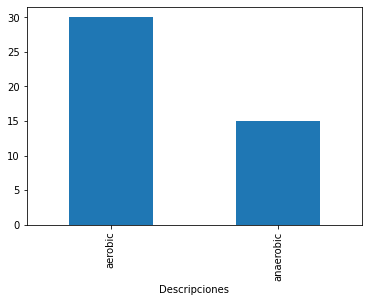

In [11]:
respiration_ORFs = ORFs_respiration(data_class)

In [12]:
print("El número de ORFs que se encuentran relacionados a la descripción de Respiración es {}"
      .format(respiration_ORFs))

El número de ORFs que se encuentran relacionados a la descripción de Respiración es 45


## Ejercicio 2.1

count_class() cuenta el número de clases que tienen un patrón dado en su descripción y además imprime por pantalla un gráfico con las clases que más se repiten


 Principales Clases del pattern: 

AxesSubplot(0.125,0.125;0.775x0.755)


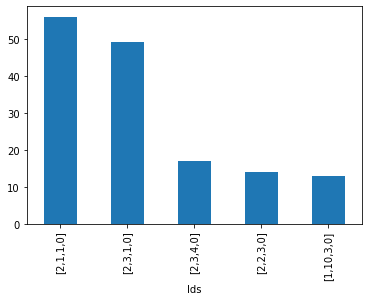

In [13]:
numero_clases_protein = count_class(data_class, ".*prot")

In [18]:
print("El número de clases que contiene en su descripción el patrón 'protein' es: {}"
      .format(numero_clases_protein))

El número de clases que contiene en su descripción el patrón 'protein' es: 311



 Principales Clases del pattern: 

AxesSubplot(0.125,0.125;0.775x0.755)


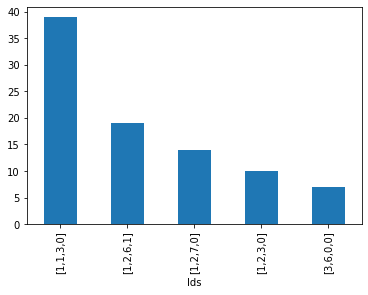

In [19]:
numero_clases_hydro = count_class(data_class, ".*hydro")

In [22]:
print("El número de clases que contiene en su descripción el patrón 'hydro' es: {}"
      .format(numero_clases_hydro))

El número de clases que contiene en su descripción el patrón 'hydro' es: 166



 Principales Clases del pattern: 

AxesSubplot(0.125,0.125;0.775x0.755)


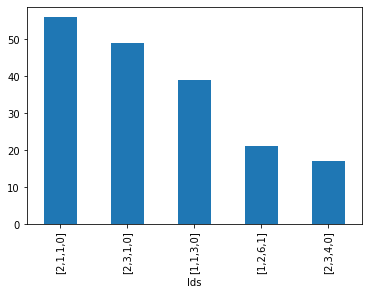

In [21]:
numero_clases_hydro_prote = count_class(data_class, ".*hydro|.*prot")

In [24]:
print("El número de clases que contiene en su descripción el patrón 'hydro' o 'protein' es: {}"
      .format(numero_clases_hydro_prote))

El número de clases que contiene en su descripción el patrón 'hydro' o 'protein' es: 477


## Ejercicio 2.2 

mean_ORF_related() trae el número de ORFs promedios con los que se relaciona un ORF con un patrón de búsqueda dado:

Top ORFs con mayor cantidad de relaciones: 
 AxesSubplot(0.125,0.125;0.775x0.755)


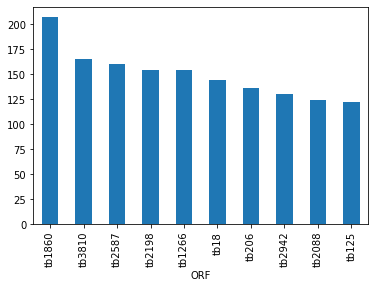

In [25]:
mean_protein = mean_ORF_related(data_class, data_ORFS, ".*prot")

In [26]:
print("El número promedio con los que se relaciona el ORF con 'protein' es: {}"
      .format(mean_protein))

El número promedio con los que se relaciona el ORF con 'protein' es: 32.73225806451613


Top ORFs con mayor cantidad de relaciones: 
 AxesSubplot(0.125,0.125;0.775x0.755)


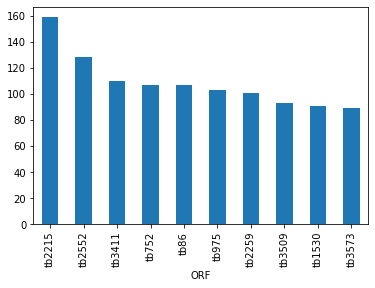

In [27]:
mean_hydro = mean_ORF_related(data_class, data_ORFS, ".*hydro")

In [28]:
print("El número promedio con los que se relaciona el ORF con '.*hydro' es: {}"
      .format(mean_hydro))

El número promedio con los que se relaciona el ORF con '.*hydro' es: 37.04819277108434


## Ejercicio 3

count_class_multiplos() cuenta el número de clases que tienen al menos una dimensión múltiplo del entero dado, siendo este mayor a 0 y menor a 9:

In [33]:
clases = list(set(data_class["Ids"]))
for i in list(range(2,10)):
        print("M={}:".format(i), count_class_multiplos(i, clases), "clases")

M=2: 117 clases
M=3: 59 clases
M=4: 43 clases
M=5: 13 clases
M=6: 16 clases
M=7: 19 clases
M=8: 7 clases
M=9: 3 clases
